In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('missing_children_data.csv', encoding='latin-1')

#not sure why i had to add the latin-1 there

# EDA

In [3]:
df.head()

,childid,childfirstname,childlastname,birthdate,sex,race,haircolor,eyecolor,height (inches),weight (lbs),missingreporteddate,missingfromdate,missingfromcity,missingfromstate,missingfromcountry,ncmeccasenumber,casetype,postercontact,posterurl
0,1,Christopher,Abeyta,11/28/85 0:00,Male,White,Blonde,Blue,26,17,7/16/86 0:00,7/15/86 0:00,Colorado Springs,CO,United States,600552,Lost Injured Missing,Colorado Springs Police Department (Colorado) ...,www.missingkids.org/poster/NCMC/600552/1/
1,4,Aaron,Anderson,6/23/87 0:00,Male,White,Lt. Brown,Brown,28,32,5/23/89 16:57,4/7/89 0:00,Pine City,MN,United States,723921,Non Family Abduction,Pine County Sheriff's Department (Minnesota),www.missingkids.org/poster/NCMC/723921/1/
2,15,Taranika,Raymond,7/6/82 0:00,Female,Black,Black,Brown,63,165,2/29/96 11:07,11/13/95 0:00,New Orleans,LA,United States,815318,Endangered Runaway,New Orleans Police Department (Louisiana)1-504...,www.missingkids.org/poster/NCMC/815318/1/
3,18,Ruben,Felix,10/18/94 0:00,Male,Hispanic,Sandy,Blue,30,32,3/14/97 17:58,2/23/97 0:00,Shoshone,ID,United States,830148,Lost Injured Missing,Lincoln County Sheriff's Office (Idaho) - Mis...,www.missingkids.org/poster/NCMC/830148/1/
4,29,Tiffany,Dixon,7/18/79 0:00,Female,Hispanic,Black,Brown,62,105,10/25/91 12:36,10/10/91 0:00,Brooklyn,NY,United States,760721,Lost Injured Missing,New York City Police Department (New York) - M...,www.missingkids.org/poster/NCMC/760721/1/


### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   childid              2834 non-null   int64 
 1   childfirstname       2834 non-null   object
 2   childlastname        2833 non-null   object
 3   birthdate            2834 non-null   object
 4   sex                  2834 non-null   object
 5   race                 2834 non-null   object
 6   haircolor            2518 non-null   object
 7   eyecolor             2519 non-null   object
 8   height (inches)      2834 non-null   int64 
 9   weight (lbs)         2834 non-null   int64 
 10  missingreporteddate  2834 non-null   object
 11  missingfromdate      2834 non-null   object
 12  missingfromcity      2834 non-null   object
 13  missingfromstate     2821 non-null   object
 14  missingfromcountry   2834 non-null   object
 15  ncmeccasenumber      2834 non-null   int64 
 16  casety

In [5]:
df.columns

Index(['childid', 'childfirstname', 'childlastname', 'birthdate', 'sex',
       'race', 'haircolor', 'eyecolor', 'height (inches)', 'weight (lbs)',
       'missingreporteddate', 'missingfromdate', 'missingfromcity',
       'missingfromstate', 'missingfromcountry', 'ncmeccasenumber', 'casetype',
       'postercontact', 'posterurl'],
      dtype='object')

In [6]:
print(f'In the dataset there are {df.shape[0]} rows and there are {df.shape[1]} columns.')

In the dataset there are 2834 rows and there are 19 columns.


In [7]:
#Checking the null values in the data 
df.isna().sum().sort_values(ascending=False)

haircolor              316
eyecolor               315
missingfromstate        13
childlastname            1
childid                  0
missingfromdate          0
postercontact            0
casetype                 0
ncmeccasenumber          0
missingfromcountry       0
missingfromcity          0
weight (lbs)             0
missingreporteddate      0
childfirstname           0
height (inches)          0
race                     0
sex                      0
birthdate                0
posterurl                0
dtype: int64

In [8]:
#fixing null values

df['haircolor'] = df['haircolor'].fillna('Unknown')
df['eyecolor'] = df['eyecolor'].fillna('Unkown')
df['childlastname'] = df['childlastname'].fillna('Unknown')

In [9]:
#labelling cases from canada and mexico as 'International'
#This will fix the missing values in the missingfromstate column


df['missingfromstate'] = df['missingfromstate'].fillna('International')

In [10]:
#changing missingfromdate and birthdate to datetime format so they can be subtracted
df['missingfromdate'] = pd.to_datetime(df['missingfromdate'])
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['missingreporteddate'] = pd.to_datetime(df['missingreporteddate'])

In [11]:
#adding a column for age at time gone missing. possible oversight from original dataset
df['age_when_missing']= (df['missingfromdate'] - df['birthdate'])

In [12]:
#making new column from our subtraction that is an int type
df['age_years']= df['age_when_missing'].dt.days

In [13]:
#converting age_years into years
df['age_years'] /=365

In [14]:
df['age_years'] = df['age_years'].round(1)

In [15]:
#getting rid of messed up rows with birthdates in the future
#This ended up omitting 280 rows
df = df.loc[df['age_years'] >= 0]

In [16]:
#df = df.drop('age_when_missing', axis=1)

In [17]:
df.isna().sum().sort_values(ascending=False)

childid                0
missingfromdate        0
age_when_missing       0
posterurl              0
postercontact          0
casetype               0
ncmeccasenumber        0
missingfromcountry     0
missingfromstate       0
missingfromcity        0
missingreporteddate    0
childfirstname         0
weight (lbs)           0
height (inches)        0
eyecolor               0
haircolor              0
race                   0
sex                    0
birthdate              0
childlastname          0
age_years              0
dtype: int64

In [18]:
sex_integer = {'Male': 0, 'Female': 1}
df['sex_integer'] = df['sex'].map(sex_integer).astype(int)

In [19]:
casetype_num = {'Endangered Runaway': 1, 'Family Abduction': 2, 'Lost Injured Missing':
                3, 'Non Family Abduction': 4, 'Section 5779': 5}
df['casetype_num'] = df['casetype'].map(casetype_num).astype(int)

In [20]:
#df = df.drop('sex', axis=1)

In [21]:
df.describe()

,childid,height (inches),weight (lbs),ncmeccasenumber,age_when_missing,age_years,sex_integer,casetype_num
count,2554.000000,2554.000000,2554.000000,2.554000e+03,2554,2554.000000,2554.000000,2554.000000
mean,457600.554816,58.809319,116.339076,1.172327e+06,4945 days 08:25:19.569303040,13.548434,0.635865,1.724354
std,201086.595752,12.198677,52.673150,1.901317e+05,1891 days 11:41:32.663858528,5.181489,0.481281,1.120256
min,1.000000,0.000000,0.000000,6.000900e+05,3 days 00:00:00,0.000000,0.000000,1.000000
25%,431831.250000,58.000000,95.000000,1.166155e+06,4689 days 06:00:00,12.800000,0.000000,1.000000
50%,563795.500000,63.000000,120.000000,1.269042e+06,5756 days 11:00:00,15.800000,1.000000,1.000000
75%,583956.250000,66.000000,145.000000,1.283953e+06,6172 days 15:00:00,16.900000,1.000000,2.000000
max,592376.000000,77.000000,1160.000000,1.290468e+06,8022 days 00:00:00,22.000000,1.000000,5.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2554 entries, 0 to 2833
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   childid              2554 non-null   int64          
 1   childfirstname       2554 non-null   object         
 2   childlastname        2554 non-null   object         
 3   birthdate            2554 non-null   datetime64[ns] 
 4   sex                  2554 non-null   object         
 5   race                 2554 non-null   object         
 6   haircolor            2554 non-null   object         
 7   eyecolor             2554 non-null   object         
 8   height (inches)      2554 non-null   int64          
 9   weight (lbs)         2554 non-null   int64          
 10  missingreporteddate  2554 non-null   datetime64[ns] 
 11  missingfromdate      2554 non-null   datetime64[ns] 
 12  missingfromcity      2554 non-null   object         
 13  missingfromstate  

### Plots

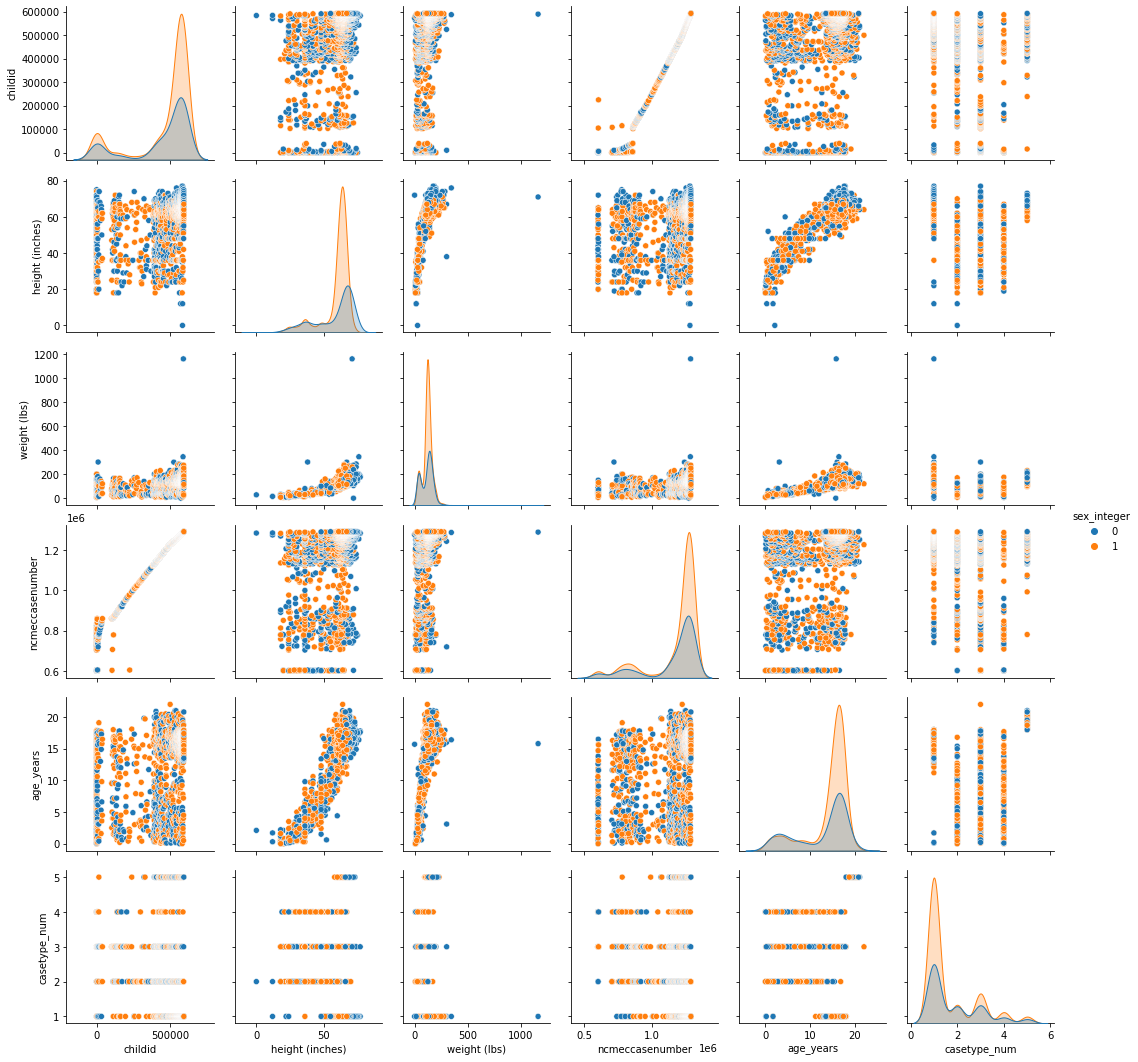

In [23]:
sns.pairplot(df,hue='sex_integer')
plt.show()

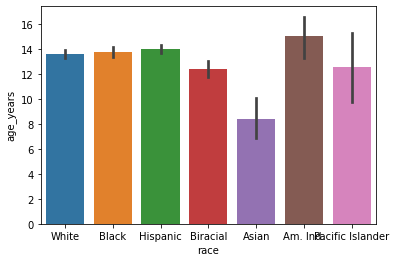

In [24]:
# bar plot showing relationship between race and age gone missing
sns.barplot(x='race', y='age_years', data=df)
plt.show()

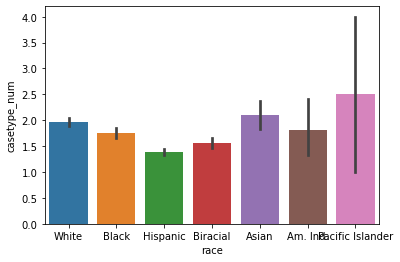

In [25]:
#bar plot showing relationship between race and casetype
sns.barplot(x='race', y='casetype_num', data=df)
plt.show()

In [26]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm')

,childid,height (inches),weight (lbs),ncmeccasenumber,age_years,sex_integer,casetype_num
childid,1.000000,0.443546,0.431771,0.982940,0.490163,0.066564,-0.632254
height (inches),0.443546,1.000000,0.772820,0.445875,0.924061,0.047614,-0.418599
weight (lbs),0.431771,0.772820,1.000000,0.430238,0.758295,0.038680,-0.396747
ncmeccasenumber,0.982940,0.445875,0.430238,1.000000,0.491193,0.065014,-0.626885
age_years,0.490163,0.924061,0.758295,0.491193,1.000000,0.142863,-0.400125
sex_integer,0.066564,0.047614,0.038680,0.065014,0.142863,1.000000,-0.080169
casetype_num,-0.632254,-0.418599,-0.396747,-0.626885,-0.400125,-0.080169,1.000000


In [27]:
corr =df[['age_years','height (inches)', 'weight (lbs)', 'casetype_num', 'sex_integer']].corr()

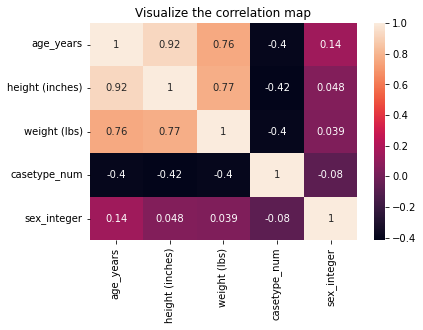

In [28]:
# Visualize the Correlation map

sns.heatmap(corr,annot=True)
plt.title("Visualize the correlation map")
plt.show()

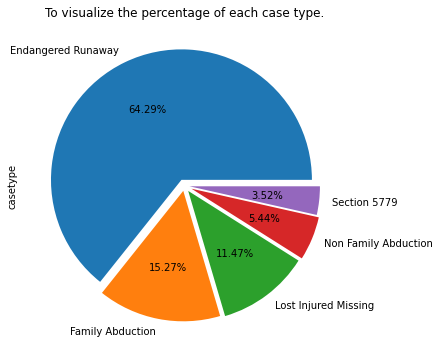

In [29]:
df['casetype'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="To visualize the percentage of each case type.",explode=[0.05,0.04,0.05,0.06,0.04],
    labels=['Endangered Runaway','Family Abduction','Lost Injured Missing','Non Family Abduction', 'Section 5779'],
    autopct='%1.2f%%')
plt.show()

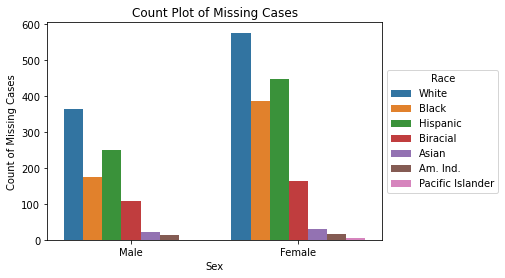

In [30]:
#plot of casetype_num and sex_integer
countplot = sns.countplot(x='sex', hue='race', data=df)
countplot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Race')
plt.xlabel('Sex')
plt.ylabel('Count of Missing Cases')
plt.title('Count Plot of Missing Cases')
plt.show()

In [31]:
df.columns

Index(['childid', 'childfirstname', 'childlastname', 'birthdate', 'sex',
       'race', 'haircolor', 'eyecolor', 'height (inches)', 'weight (lbs)',
       'missingreporteddate', 'missingfromdate', 'missingfromcity',
       'missingfromstate', 'missingfromcountry', 'ncmeccasenumber', 'casetype',
       'postercontact', 'posterurl', 'age_when_missing', 'age_years',
       'sex_integer', 'casetype_num'],
      dtype='object')

### Multiple Linear Regression

In [32]:
race_num = {'White': 1, 'Hispanic': 2, 'Black': 3, 'Biracial': 4, 'Asian': 5, 'Am. Ind.': 6, 'Pacific Islander': 7}
df['race_num'] = df['race'].map(race_num).astype(int)

In [33]:
race_bin = np.where(df['race_num']<= 1,0,1)
#white = 0,   POC = 1

In [34]:
X = df[['race_num', 'sex_integer', 'age_years']]
y = df['casetype']

#regression = linear_model.LinearRegression()
#regression.fit(X, y)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                  test_size=.4,
                                                  random_state=100)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

### Predicting Case Type

In [37]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

      race_num  sex_integer  age_years
1185         1            1        6.9
1459         1            1       16.3
1706         1            0       16.5
1711         2            1       17.0
1051         5            0        2.7
...        ...          ...        ...
1757         2            1       14.9
2107         3            0       17.8
563          2            0        2.0
1408         2            1       14.0
239          3            1        8.7

[1022 rows x 3 columns]
['Lost Injured Missing' 'Endangered Runaway' 'Endangered Runaway' ...
 'Family Abduction' 'Endangered Runaway' 'Lost Injured Missing']


In [39]:
df.columns

Index(['childid', 'childfirstname', 'childlastname', 'birthdate', 'sex',
       'race', 'haircolor', 'eyecolor', 'height (inches)', 'weight (lbs)',
       'missingreporteddate', 'missingfromdate', 'missingfromcity',
       'missingfromstate', 'missingfromcountry', 'ncmeccasenumber', 'casetype',
       'postercontact', 'posterurl', 'age_when_missing', 'age_years',
       'sex_integer', 'casetype_num', 'race_num'],
      dtype='object')

In [43]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7348336594911937


In [44]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [45]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[639   1   5   0   0]
 [  8  68  41   6   0]
 [ 82  35  40  11   0]
 [  9  19  20   3   0]
 [ 34   0   0   0   1]]


In [48]:
logreg.classes_

array(['Endangered Runaway', 'Family Abduction', 'Lost Injured Missing',
       'Non Family Abduction', 'Section 5779'], dtype=object)

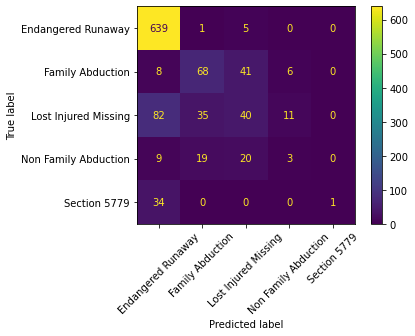

In [55]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=logreg.classes_)
disp.plot()
plt.xticks(rotation=45)
plt.show()